In [28]:
# Neuste Version von Numpy installieren, da für Gensim mind. die Numpy-Version 2.0.0 notwendig ist:
import numpy as np
!pip install --upgrade numpy
print("Die installierte Numpy-Version lautet:")
print(np.__version__)

Die installierte Numpy-Version lautet:
1.26.4


Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip'


In [3]:
# Installation - Gensim:
!pip install gensim
!pip show gensim
print("Gensim wurde erfolgreich installiert.")

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip'


Gensim wurde erfolgreich installiert.


Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip'


In [4]:
# Bibliotheken-Import:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib
import json   
import gensim
import gensim.corpora as corpora

print("Die Bibliotheken wurden erfolgreich initialisiert!")

Die Bibliotheken wurden erfolgreich initialisiert!


In [5]:
# Den vorverarbeiteten Datensatz einlesen
try:
    processed_df = pd.read_csv('C:/Users/test/Desktop/Projekt_Data Analysis/Kundenbeschwerden_Vorverarbeitet.csv')
    print("Der vorverarbeitete Datensatz wurde gefunden!")
    print(f"Geladene Texte: {len(processed_df)}")
except FileNotFoundError:
    print("Fehler: Datei 'Kundenbeschwerden_Vorverarbeitet.csv' nicht gefunden!")

Der vorverarbeitete Datensatz wurde gefunden!
Geladene Texte: 66806


In [6]:
# Korpus erstellen, NaN-Werte entfernen und Listen-Konvertierung:
corpus = processed_df['processed_text'].dropna().tolist()
print("Der Korpus wurde erstellt, NaN-Werte wurden entfernt und Numpy-Arrays wurden zu Listen konvertiert.") 

Der Korpus wurde erstellt, NaN-Werte wurden entfernt und Numpy-Arrays wurden zu Listen konvertiert.


In [7]:
# Vektorisierung mittels TF-IDF:
tfidf_vectorizer = TfidfVectorizer(
    max_features = 100,  # Definition der 100 häufigsten Themen
    min_df = 5,          # Begriffe müssen in mindestens 5 Dokumenten vorkommen
    max_df= 0.85,        # Begriffe, die in mehr als 85% der Dokumente vorkommen
    ngram_range=(1, 2)   # Berücksichtigt Unigramme und Bigramme
)

print("TF-IDF-Vektorisierung wurde definiert. Kriterien: Die 100 häufigsten Themen, Begriffe müssen in min. 5 Dokumenten vorkommen und zu 85% in allen Dokumenten sowie werden Bi- und Unigramme berücksichtigt.")

TF-IDF-Vektorisierung wurde definiert. Kriterien: Die 100 häufigsten Themen, Begriffe müssen in min. 5 Dokumenten vorkommen und zu 85% in allen Dokumenten sowie werden Bi- und Unigramme berücksichtigt.


In [8]:
# Vektorisierung:
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
print(f"TF-IDF-Matrix erstellt mit Shape: {tfidf_matrix.shape}")
print("Beispielbegriffe:", list(tfidf_vectorizer.get_feature_names_out()[:10]))

TF-IDF-Matrix erstellt mit Shape: (66803, 100)
Beispielbegriffe: ['account', 'address', 'agency', 'also', 'amount', 'another', 'asked', 'back', 'balance', 'bank']


In [9]:
# TF-IDF Modell - Speicherung:
joblib.dump(tfidf_vectorizer, 'C:/Users/test/Desktop/Projekt_Data Analysis/TFIDF_Vektorisierung.joblib')
np.save('C:/Users/test/Desktop/Projekt_Data Analysis/TFIDF-Matrix.npy', tfidf_matrix.toarray())
print("Die TF-IDF Modelle wurden erfolgreich gespeichert!")

Die TF-IDF Modelle wurden erfolgreich gespeichert!


In [10]:
# Für bessere Interpretierbarkeit kann das TF-IDF-Vokabular als JSON-Datei gespeichert werden:
vocabulary_clean = {k: int(v) for k, v in tfidf_vectorizer.vocabulary_.items()} # Änderung des Datentyps

vocabulary = tfidf_vectorizer.vocabulary_
with open('C:/Users/test/Desktop/Projekt_Data Analysis/TFIDF_Vektorisierung.json', 'w', encoding='utf-8') as f:
    json.dump(vocabulary_clean, f, ensure_ascii=False, indent=4)

print("Das TF-IDF-Modell wurde zusätzlich im JSON-Format abgespeichert.")

Das TF-IDF-Modell wurde zusätzlich im JSON-Format abgespeichert.


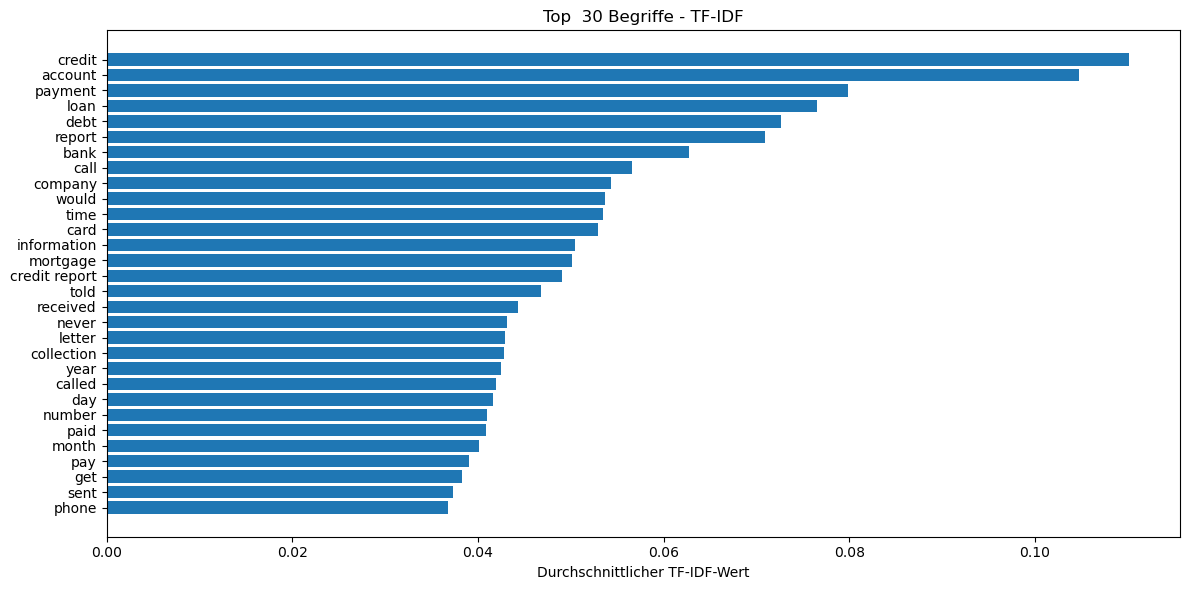

In [30]:
# Mittelwertberechnung jeder Spalte:
tfidf_means = np.asarray(tfidf_matrix.mean(axis=0)).flatten()

# Definition Begriffe:
terms = tfidf_vectorizer.get_feature_names_out()

# Top 30 Begriffe mit höchstem durchschnittlichen TF-IDF-Wert:
top_n = 30
top_indices = tfidf_means.argsort()[::-1][:top_n]
top_terms = [terms[i] for i in top_indices]
top_scores = [tfidf_means[i] for i in top_indices]

# Erstellung eines Balkendiagramm:
plt.figure(figsize=(12, 6))
plt.barh(top_terms[::-1], top_scores[::-1])  # Ohne [::-1] sind die niedrigsten Werte oben
plt.xlabel("Durchschnittlicher TF-IDF-Wert")
plt.title("Top  30 Begriffe - TF-IDF")
plt.tight_layout()
plt.show()

In [12]:
# Prüfen, ob Datensatz vorhanden ist und laden:
data = pd.read_csv('C:/Users/test/Desktop/Projekt_Data Analysis/Kundenbeschwerden_Vorverarbeitet.csv', low_memory=False)
print(f"Vorverarbeiteter Datensatz ist vorhanden und geladen: {data.shape[0]} Zeilen und {data.shape[1]} Spalten")

Vorverarbeiteter Datensatz ist vorhanden und geladen: 66806 Zeilen und 1 Spalten


In [13]:
# CountVectorizer für Bag-of-Words erstellen:
count_vectorizer = CountVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.85,
    ngram_range=(1, 2)
)

print("Der CountVectorizer für die BoW-Technik wurde erstellt.")

Der CountVectorizer für die BoW-Technik wurde erstellt.


In [14]:
# Berechnung - Count Matrix:
count_matrix = count_vectorizer.fit_transform(corpus)
print(f"Die Count Matrix wurde erstellt und beinhaltet: {count_matrix.shape[0]} Dokumente/Zeilen, {count_matrix.shape[1]} Features")

Die Count Matrix wurde erstellt und beinhaltet: 66803 Dokumente/Zeilen, 5000 Features


In [15]:
# Speicherung Count Vectorizers und Matrix: 
joblib.dump(count_vectorizer, 'C:/Users/test/Desktop/Projekt_Data Analysis/Zähl-Vektorisierung_LDA.joblib')
np.save('C:/Users/test/Desktop/Projekt_Data Analysis/Zähl-Matrix_LDA.npy', count_matrix.toarray())

print("Die Daten für die LDA-Analyse wurden erfolgreich abgespeichert.")

Die Daten für die LDA-Analyse wurden erfolgreich abgespeichert.


In [16]:
# Vokabular-Speicherung zur LDA-Interpretation:
count_vocabulary = count_vectorizer.vocabulary_
print("Die Vokabeln für die LDA-Analyse wurden gespeichert.")

Die Vokabeln für die LDA-Analyse wurden gespeichert.


In [17]:
# Konvertierung von numpy.int64-Werte zu Python int:
count_vocabulary = {key: int(value) for key, value in count_vocabulary.items()}
print("Die numpy integer 64 Werte wurden zu Python integer konvertiert.")

Die numpy integer 64 Werte wurden zu Python integer konvertiert.


In [18]:
# Vokabular-Speicherung als JSON:
with open('C:/Users/test/Desktop/Projekt_Data Analysis/Zähl-Vokabeln.json', 'w', encoding='utf-8') as f:
    json.dump(vocabulary_clean, f, ensure_ascii=False, indent=4)
print("Das Vokabular wurde als JSON-Datei gespeichert.")

Das Vokabular wurde als JSON-Datei gespeichert.


In [19]:
# Visualisierung - Häufigsten Terme:
term_freq = np.sum(count_matrix.toarray(), axis=0)
count_terms = count_vectorizer.get_feature_names_out()

In [20]:
# Häufigkeitssortierung und Anzeigen der Top 30 Begriffe:
term_freq_sorted = sorted(zip(count_terms, term_freq), key=lambda x: x[1], reverse=True)
top_terms = term_freq_sorted[:30][::-1]

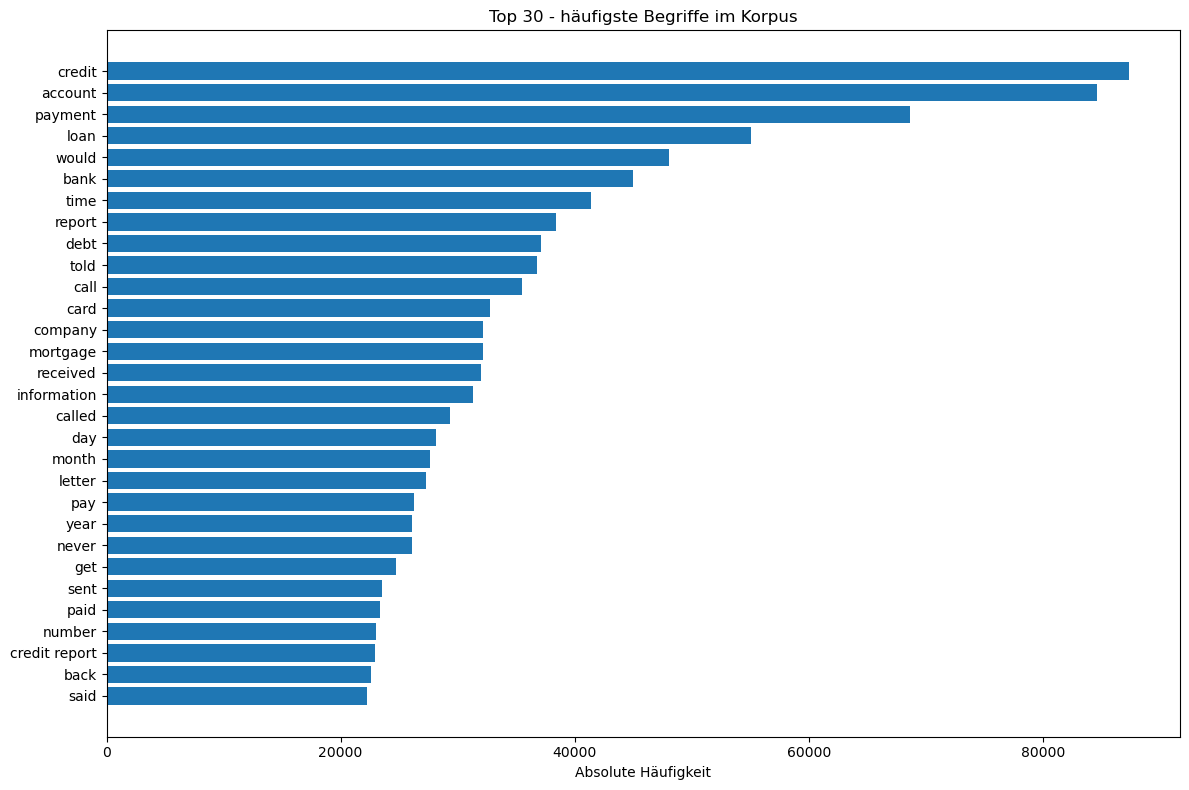

In [21]:
# Balkendiagramm-Daten:
plt.figure(figsize=(12, 8))
plt.barh([term[0] for term in top_terms], [term[1] for term in top_terms])
plt.xlabel('Absolute Häufigkeit')
plt.title('Top 30 - häufigste Begriffe im Korpus')
plt.tight_layout()
plt.savefig('C:/Users/test/Desktop/Projekt_Data Analysis/Häufigste_Begriffe.png')
plt.show()

In [22]:
# Erstellung Gensim Korpus für Kohärenz-Score:
processes_df = pd.read_csv ('C:/Users/test/Desktop/Projekt_Data Analysis/Kundenbeschwerden_Vorverarbeitet.csv')
corpus = processed_df['processed_text'].dropna().tolist()
print("Der Korpus wurde erstellt!")


Der Korpus wurde erstellt!


In [23]:
# Erstellung tokenisierter Texte für Gensim:
print("Datenvorbereitung für Gensim und Kohärenz-Score...")
tokenized_texts = []
for text in corpus:
    if isinstance (text, str) and text.strip():
        tokens = text.split()
        if tokens:
            tokenized_texts.append(tokens)
print(f"Tokenisierter Korpus erstellt mit {len(tokenized_texts)} Dokumenten.")

Datenvorbereitung für Gensim und Kohärenz-Score...
Tokenisierter Korpus erstellt mit 66803 Dokumenten.


In [24]:
# Erstellung Gensim Dictionary:
dictionary = corpora.Dictionary(tokenized_texts)

# Filterung der extremen Werten aus Dictionary:
dictionary.filter_extremes (no_below=5, no_above=0.7)
print(f"Gensim Dictionary erstellt mit {len(dictionary)} eindeutigen Tokens")

Gensim Dictionary erstellt mit 12630 eindeutigen Tokens


In [25]:
# Erstellung - Gensim Korpus: 
gensim_corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
print (f"Gensim Korpus erstellt mit {len(gensim_corpus)} Dokumenten")

Gensim Korpus erstellt mit 66803 Dokumenten


In [26]:
# Speichern für die spätere Themenextraktion
dictionary.save('C:/Users/test/Desktop/Projekt_Data Analysis/gensim_dictionary.dict')
joblib.dump(tokenized_texts, 'C:/Users/test/Desktop/Projekt_Data Analysis/tokenized_texts.joblib')
joblib.dump(gensim_corpus, 'C:/Users/test/Desktop/Projekt_Data Analysis/gensim_corpus.joblib')
print("Die Files wurden abgespeichert!")

Die Files wurden abgespeichert!
